In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
kospi200 = pd.read_csv("./data/data.csv", encoding="cp949")
kospi200 = kospi200[kospi200.columns[:2]]
kospi200["종목코드"] = kospi200["종목코드"].map('{:06d}'.format)
kospi200.head()

,종목코드,종목명
0,006840,AK홀딩스
1,027410,BGF
2,282330,BGF리테일
3,138930,BNK금융지주
4,001040,CJ


In [5]:
code_dict = {
    i : j for i, j in zip(kospi200["종목명"], kospi200["종목코드"])
}

In [6]:
import pickle

with open('raw_data_20180811.pickle', 'rb') as handle:
    raw_data = pickle.load(handle)

In [7]:
raw_data["005930"].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,21400.0,21600.0,21300.0,21600.0,21.233131,13151350
2012-01-03,21860.0,22100.0,21840.0,22100.0,21.724644,16927750
2012-01-04,22100.0,22200.0,21500.0,21600.0,21.233131,17103700
2012-01-05,21460.0,21580.0,21100.0,21100.0,20.741627,17298400
2012-01-06,21120.0,21320.0,20600.0,20800.0,20.446722,18816250


In [31]:
from sklearn.preprocessing import MinMaxScaler
import sys
mod = sys.modules[__name__]
minmax = MinMaxScaler()
for i in raw_data.keys():
    raw_data[i] = raw_data[i].assign(pct_change = raw_data[i].Close.pct_change().fillna(0))
    for j in range(5,30,2):
        raw_data[i]["ma_{}".format(j)] = raw_data[i].Close.rolling(j).mean()
        raw_data[i]["ma_{}".format(j)] = raw_data[i]["ma_{}".format(j)].fillna(method = "bfill")
    raw_data[i]["minmax_vol"] = minmax.fit_transform(raw_data[i].Volume.values.reshape(-1,1))
    raw_data[i]["minmax_close"] = (raw_data[i].Close - raw_data[i].Low)/(raw_data[i].High - raw_data[i].Low)
    raw_data[i]["minmax_vol"] = raw_data[i]["minmax_vol"].fillna(raw_data[i]["minmax_vol"].mean())
    raw_data[i]["minmax_close"] = raw_data[i]["minmax_close"].fillna(raw_data[i]["minmax_close"].mean())

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
raw_data["005930"]

,Open,High,Low,Close,Adj Close,Volume,pct_change,ma_5,ma_7,ma_9,...,ma_15,ma_17,ma_19,ma_21,ma_23,ma_25,ma_27,ma_29,minmax_vol,minmax_close
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,21400.0,21600.0,21300.0,21600.0,21.233131,13151350,0.000000,21440.0,21148.571429,21002.222222,...,21026.666667,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.620690,0.203325,1.000000
2012-01-03,21860.0,22100.0,21840.0,22100.0,21.724644,16927750,0.023148,21440.0,21148.571429,21002.222222,...,21026.666667,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.620690,0.261710,1.000000
2012-01-04,22100.0,22200.0,21500.0,21600.0,21.233131,17103700,-0.022624,21440.0,21148.571429,21002.222222,...,21026.666667,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.620690,0.264430,0.142857
2012-01-05,21460.0,21580.0,21100.0,21100.0,20.741627,17298400,-0.023148,21440.0,21148.571429,21002.222222,...,21026.666667,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.620690,0.267441,0.000000
2012-01-06,21120.0,21320.0,20600.0,20800.0,20.446722,18816250,-0.014218,21440.0,21148.571429,21002.222222,...,21026.666667,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.620690,0.290907,0.277778
2012-01-09,20800.0,20820.0,20300.0,20320.0,19.974876,19283000,-0.023077,21184.0,21148.571429,21002.222222,...,21026.666667,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.620690,0.298123,0.038462
2012-01-10,20420.0,20720.0,20420.0,20520.0,20.171476,20414800,0.009843,20868.0,21148.571429,21002.222222,...,21026.666667,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.620690,0.315621,0.333333
2012-01-11,20340.0,20480.0,20280.0,20420.0,20.073179,19110150,-0.004873,20632.0,20980.000000,21002.222222,...,21026.666667,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.620690,0.295451,0.700000
2012-01-12,20320.0,20580.0,20220.0,20560.0,20.210798,18511000,0.006856,20524.0,20760.000000,21002.222222,...,21026.666667,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.620690,0.286188,0.944444


In [36]:
raw_data["005930"]["pct_change"].iloc[0:5]

Date
2012-01-02    0.000000
2012-01-03    0.023148
2012-01-04   -0.022624
2012-01-05   -0.023148
2012-01-06   -0.014218
Name: pct_change, dtype: float64

In [44]:
for i in raw_data.keys():
    li = []
    df = raw_data[i]["pct_change"]
    for j in range(len(df)):
        if j < 5:
            li.append(-1)
        else:
            if df.iloc[j-5:j].mean() > df.iloc[j]:
                li.append(0)
            else:
                li.append(1)
    raw_data[i]["Y"] = li

In [14]:
for code in raw_data.keys():
    pct_ma = raw_data[code]["pct_change"].rolling(5).mean().fillna(method="bfill")
    raw_data[code]["Y"] = np.where(pct_ma < raw_data[code]["pct_change"], 1, 0)

In [15]:
raw_data["005930"].head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,ma_5,ma_7,ma_9,...,ma_17,ma_19,ma_21,ma_23,ma_25,ma_27,ma_29,minmax_vol,minmax_close,Y
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,21400.0,21600.0,21300.0,21600.0,21.233131,13151350,0.000000,21440.0,21148.571429,21002.222222,...,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.62069,0.203325,1.000000,1
2012-01-03,21860.0,22100.0,21840.0,22100.0,21.724644,16927750,0.023148,21440.0,21148.571429,21002.222222,...,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.62069,0.261710,1.000000,1
2012-01-04,22100.0,22200.0,21500.0,21600.0,21.233131,17103700,-0.022624,21440.0,21148.571429,21002.222222,...,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.62069,0.264430,0.142857,0
2012-01-05,21460.0,21580.0,21100.0,21100.0,20.741627,17298400,-0.023148,21440.0,21148.571429,21002.222222,...,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.62069,0.267441,0.000000,0
2012-01-06,21120.0,21320.0,20600.0,20800.0,20.446722,18816250,-0.014218,21440.0,21148.571429,21002.222222,...,21172.941176,21302.105263,21355.238095,21364.347826,21388.8,21416.296296,21418.62069,0.290907,0.277778,0


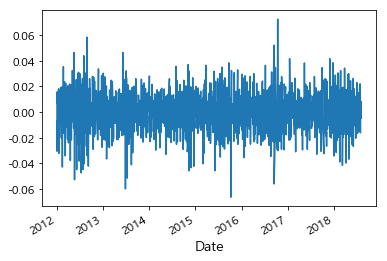

In [58]:
(raw_data["005930"]["pct_change"].rolling(5).mean().fillna(method="bfill") - raw_data["005930"]["pct_change"]).plot()

In [69]:
setattr(mod, "a", {1:0,2:3})
a

{1: 0, 2: 3}

In [71]:
getattr(mod, "a")[1] =1
a

{1: 1, 2: 3}

In [66]:
len(raw_data[i])

1620

In [74]:
for i in raw_data.keys():
    print("{} : {}".format(i, sum(raw_data[i].Y==1)/len(raw_data[i])))

006840 : 0.4820987654320988
027410 : 0.49177153920619554
282330 : 0.5222929936305732
138930 : 0.4888888888888889
001040 : 0.47530864197530864
079160 : 0.4808641975308642
000120 : 0.48703703703703705
097950 : 0.49691358024691357
005830 : 0.49876543209876545
000990 : 0.4660493827160494
114090 : 0.4777777777777778
078930 : 0.48271604938271606
006360 : 0.4728395061728395
007070 : 0.4845679012345679
012630 : 0.47160493827160493
294870 : 0.5
001060 : 0.4858024691358025
096760 : 0.4722222222222222
105560 : 0.49506172839506174
002380 : 0.4882716049382716
030200 : 0.4901234567901235
033780 : 0.49320987654320986
093050 : 0.48333333333333334
003550 : 0.4728395061728395
034220 : 0.48271604938271606
001120 : 0.4839506172839506
051900 : 0.49382716049382713
032640 : 0.4808641975308642
011070 : 0.4777777777777778
066570 : 0.47469135802469137
108670 : 0.4666666666666667
051910 : 0.4858024691358025
079550 : 0.46176046176046176
006260 : 0.48148148148148145
010120 : 0.4765432098765432
035420 : 0.477160493

In [76]:
train_idx = {}
test_idx = {}
for i in range(5,30,2):
    setattr(mod, "train_{}".format(i), {})
    setattr(mod, "test_{}".format(i), {})

    for code, df in raw_data.items():
        getattr(mod, "train_{}".format(i))[code] = df.iloc[:int(len(df)*0.8)]["ma_{}".format(i)]
        train_idx[code] = df.iloc[:int(len(df)*0.8)]["Y"]
        getattr(mod, "test_{}".format(i))[code] = df.iloc[int(len(df)*0.8):]["ma_{}".format(i)]
        test_idx[code] = df.iloc[int(len(df)*0.8):]["Y"]

In [77]:
train_9["005930"].head()

Date
2012-01-02    21002.222222
2012-01-03    21002.222222
2012-01-04    21002.222222
2012-01-05    21002.222222
2012-01-06    21002.222222
Name: ma_9, dtype: float64

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=42)

In [105]:
train_idx["006840"].values.shape

(1296,)

In [106]:
getattr(mod, "train_{}".format(k))["006840"].values.shape

(1296,)

In [126]:
i

'298040'

In [127]:
k

15

In [123]:
np.isnan(train_15["298040"]).sum()

10

In [141]:
b

[0.5,
 0.5073966753088303,
 0.5382415738904986,
 0.5,
 0.4965622612681436,
 0.3971543162719633]

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=42)

all_list = {}
auc = {}
for k in range(5,30,2):
    score_list = pd.DataFrame(columns=('GNB','KNN','RF', 'XGB'))
    auc_score = pd.DataFrame(columns=('GNB','KNN','RF', 'XGB'))
    for i in raw_data.keys():
        a=[]
        b=[]
        X_train = getattr(mod, "train_{}".format(k))[i].values.reshape(-1,1)
        y_train = train_idx[i].values
        X_test = getattr(mod, "test_{}".format(k))[i].values.reshape(-1,1)
        y_test = test_idx[i].values

        for clf in (gnb_clf, knn_clf, rf_clf, xgb_clf):
            if np.isnan(X_train).sum() == len(X_train):
                a.append(np.NaN)
                b.append(np.NaN)
            else:
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                a.append(accuracy_score(y_test, y_pred))
                b.append(roc_auc_score(y_test, y_pred))
        score_list.loc[i] = a
        auc_score.loc[i] = b
    all_list[k] = score_list
    auc[k] = auc_score

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

In [134]:
all_list.keys()

dict_keys([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [80]:
p = pd.DataFrame()
for i, j in all_list.items():
    p = pd.concat((p, j.mean()), axis=1)
p.columns = all_list.keys()
p.index.name = "accuracy_mean"
p

,5,7,9,11,13,15,17,19,21,23,25,27,29
accuracy_mean,,,,,,,,,,,,,
GNB,0.512399,0.511293,0.512326,0.514584,0.513842,0.513170,0.512475,0.512707,0.512750,0.513056,0.513160,0.512679,0.512470
KNN,0.507710,0.505488,0.503094,0.500747,0.502879,0.502359,0.503151,0.501574,0.499218,0.501480,0.502931,0.502082,0.503208
RF,0.505946,0.503883,0.506954,0.503169,0.503656,0.498367,0.502722,0.501654,0.502544,0.501587,0.502530,0.499598,0.503592
XGB,0.510644,0.511537,0.509946,0.508598,0.506574,0.504206,0.506056,0.505004,0.505222,0.505546,0.506723,0.505984,0.507717


In [81]:
pmax = pd.DataFrame()
for i, j in all_list.items():
    pmax = pd.concat((pmax, j.max()), axis=1)
pmax.columns = all_list.keys()
pmax.index.name = "accuracy_max"
pmax

,5,7,9,11,13,15,17,19,21,23,25,27,29
accuracy_max,,,,,,,,,,,,,
GNB,0.737654,0.737654,0.737654,1.000000,0.737654,0.737654,0.737654,0.737654,0.737654,0.737654,0.737654,0.737654,0.737654
KNN,0.688272,0.750000,0.688272,0.688272,0.691358,0.737654,0.691358,0.691358,0.688272,0.737654,0.737654,0.737654,0.737654
RF,0.750000,0.734568,0.688272,0.734568,0.691358,0.737654,0.737654,0.688272,0.688272,0.740741,0.737654,0.737654,0.737654
XGB,0.688272,0.688272,0.688272,0.688272,0.691358,0.737654,0.737654,0.691358,0.737654,0.737654,0.737654,0.737654,0.737654


In [82]:
q = pd.DataFrame()
for i, j in auc.items():
    q = pd.concat((q, j.mean()), axis=1)
q.columns = auc.keys()
q.index.name = "auc_mean"
q

,5,7,9,11,13,15,17,19,21,23,25,27,29
auc_mean,,,,,,,,,,,,,
GNB,0.501439,0.499762,0.500099,0.501384,0.499849,0.499888,0.499202,0.499527,0.499546,0.499836,0.499866,0.499399,0.499216
KNN,0.506531,0.504609,0.501172,0.500148,0.501695,0.500817,0.502458,0.501777,0.499176,0.499959,0.499688,0.498415,0.499578
RF,0.503579,0.502695,0.505025,0.500812,0.502396,0.496713,0.500935,0.500716,0.502108,0.500131,0.500608,0.497473,0.501079
XGB,0.506688,0.505610,0.503546,0.503038,0.501038,0.497962,0.500143,0.501011,0.499210,0.499732,0.500789,0.498618,0.499626


In [83]:
qmax = pd.DataFrame()
for i, j in auc.items():
    qmax = pd.concat((qmax, j.max()), axis=1)
qmax.columns = auc.keys()
qmax.index.name = "auc_max"
qmax

,5,7,9,11,13,15,17,19,21,23,25,27,29
auc_max,,,,,,,,,,,,,
GNB,0.553872,0.550229,0.625000,1.000000,0.568148,0.543716,0.546448,0.551913,0.551099,0.550285,0.544007,0.538542,0.534996
KNN,0.788703,0.788703,0.788703,0.788703,0.790795,0.590196,0.790795,0.790795,0.788703,0.601604,0.641176,0.552632,0.567931
RF,0.750000,0.703209,0.788703,0.594760,0.790795,0.617845,0.599327,0.784913,0.788703,0.594276,0.686275,0.571035,0.609428
XGB,0.788703,0.788703,0.788703,0.788703,0.790795,0.571184,0.586278,0.790795,0.644385,0.591689,0.584314,0.569024,0.580808


In [85]:
train_idx = {}
test_idx = {}
for i in range(5,30,2):
    setattr(mod, "train_{}".format(i), {})
    setattr(mod, "test_{}".format(i), {})

    for code, df in raw_data.items():
        getattr(mod, "train_{}".format(i))[code] = df.iloc[:int(len(df)*0.8)][["ma_{}".format(i), "minmax_close", "minmax_vol"]]
        train_idx[code] = df.iloc[:int(len(df)*0.8)]["Y"]
        getattr(mod, "test_{}".format(i))[code] = df.iloc[int(len(df)*0.8):][["ma_{}".format(i), "minmax_close", "minmax_vol"]]
        test_idx[code] = df.iloc[int(len(df)*0.8):]["Y"]

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
#from sklearn.model_selection import GridSearchCV

gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)

In [39]:
i

'006840'

In [40]:
k

5

In [41]:
clf

GaussianNB(priors=None)

In [37]:
sum([np.isnan(i) for i in train_5["006840"].values.flatten()])

0

In [42]:
X_train

array([[1.49828801e+04],
       [8.26944342e-01],
       [2.29048978e-01],
       ...,
       [5.88400000e+04],
       [6.00000000e-01],
       [3.87066920e-02]])

In [43]:
y_train

array([1, 1, 1, ..., 1, 0, 1])

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

all_list = {}
auc = {}
for k in range(5,30,2):
    score_list = pd.DataFrame(columns=('GNB','KNN','RF', 'XGB'))
    auc_score = pd.DataFrame(columns=('GNB','KNN','RF', "XGB"))
    for i in raw_data.keys():
        a=[]
        b=[]
        X_train = getattr(mod, "train_{}".format(k))[i].values.reshape(-1,3)
        y_train = train_idx[i].values
        X_test = getattr(mod, "test_{}".format(k))[i].values.reshape(-1,3)
        y_test = test_idx[i].values

        for clf in (gnb_clf, knn_clf, rf_clf, xgb_clf):
            if np.isnan(X_train).sum() == len(X_train):
                a.append(np.NaN)
                b.append(np.NaN)
                
            else:
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                a.append(accuracy_score(y_test, y_pred))
                b.append(roc_auc_score(y_test, y_pred))
        score_list.loc[i] = a
        auc_score.loc[i] = b
    all_list[k] = score_list
    auc[k] = auc_score

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth valu

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [45]:
p = pd.DataFrame()
for i, j in all_list.items():
    p = pd.concat((p, j.mean()), axis=1)
p.columns = all_list.keys()
p.index.name = "accuracy_mean"
p

,5,7,9,11,13,15,17,19,21,23,25,27,29
accuracy_mean,,,,,,,,,,,,,
GNB,0.681702,0.684673,0.685093,0.689987,0.689659,0.688448,0.689170,0.689685,0.689693,0.688384,0.688061,0.687374,0.687245
KNN,0.519449,0.514547,0.511162,0.509933,0.508757,0.507753,0.509291,0.507525,0.504516,0.505711,0.511192,0.507410,0.508667
RF,0.694724,0.694071,0.691695,0.694909,0.694708,0.693369,0.694296,0.696441,0.696060,0.694695,0.695036,0.693876,0.693663
XGB,0.727315,0.728422,0.729364,0.729105,0.729910,0.728926,0.726863,0.726523,0.726850,0.727993,0.727689,0.726439,0.725874


In [46]:
pmax = pd.DataFrame()
for i, j in all_list.items():
    pmax = pd.concat((pmax, j.max()), axis=1)
pmax.columns = all_list.keys()
pmax.index.name = "accuracy_max"
pmax

,5,7,9,11,13,15,17,19,21,23,25,27,29
accuracy_max,,,,,,,,,,,,,
GNB,0.788462,0.79321,0.796296,1.000000,1.000000,0.805556,0.811728,0.811728,0.808642,0.811728,0.811728,0.811728,0.808642
KNN,0.688272,0.75000,0.688272,0.765432,0.753086,0.759259,0.746914,0.753086,0.762346,0.759259,0.781250,0.737654,0.737654
RF,1.000000,1.00000,1.000000,1.000000,1.000000,0.785714,0.821429,0.785714,0.857143,0.892857,0.892857,0.793210,0.785714
XGB,1.000000,1.00000,1.000000,1.000000,1.000000,0.821429,0.808642,0.799383,0.802469,0.802469,0.799383,0.802469,0.811728


In [49]:
q = pd.DataFrame()
for i, j in auc.items():
    q = pd.concat((q, j.mean()), axis=1)
q.columns = auc.keys()
q.index.name = "auc_mean"
q

,5,7,9,11,13,15,17,19,21,23,25,27,29
auc_mean,,,,,,,,,,,,,
GNB,0.674951,0.677751,0.678219,0.682343,0.682071,0.680845,0.681628,0.682212,0.682361,0.681195,0.681006,0.680358,0.680322
KNN,0.518222,0.513668,0.509212,0.510184,0.508413,0.505901,0.508272,0.507480,0.504487,0.503944,0.508435,0.503558,0.504875
RF,0.692369,0.691584,0.690045,0.692766,0.692910,0.691534,0.692712,0.694766,0.694209,0.693040,0.693232,0.692134,0.692022
XGB,0.726092,0.727233,0.728263,0.728465,0.729427,0.728016,0.725995,0.726176,0.726316,0.727355,0.727171,0.726066,0.725598


In [51]:
qmax = pd.DataFrame()
for i, j in auc.items():
    qmax = pd.concat((qmax, j.max()), axis=1)
qmax.columns = auc.keys()
qmax.index.name = "auc_mean"
qmax

,5,7,9,11,13,15,17,19,21,23,25,27,29
auc_mean,,,,,,,,,,,,,
GNB,0.793333,0.793680,0.796865,1.000000,1.000000,0.806038,0.811835,0.811835,0.808650,0.811454,0.811454,0.811454,0.808269
KNN,0.788703,0.788703,0.788703,0.788703,0.790795,0.768618,0.790795,0.790795,0.788703,0.758779,0.778431,0.685767,0.689364
RF,1.000000,1.000000,1.000000,1.000000,1.000000,0.768496,0.820856,0.772665,0.850267,0.911765,0.879679,0.783912,0.783214
XGB,1.000000,1.000000,1.000000,1.000000,1.000000,0.804813,0.811852,0.799828,0.796293,0.802662,0.799457,0.793335,0.810043


In [52]:
all_list[5]

,GNB,KNN,RF,XGB
006840,0.737654,0.512346,0.697531,0.737654
027410,0.671498,0.439614,0.671498,0.685990
282330,0.687500,0.593750,0.625000,0.718750
138930,0.734568,0.537037,0.697531,0.743827
001040,0.518519,0.549383,0.694444,0.743827
079160,0.685185,0.518519,0.709877,0.709877
000120,0.697531,0.509259,0.654321,0.694444
097950,0.709877,0.530864,0.675926,0.682099
005830,0.731481,0.540123,0.703704,0.725309
000990,0.734568,0.506173,0.700617,0.706790


In [53]:
all_list[9]

,GNB,KNN,RF,XGB
006840,0.743827,0.509259,0.694444,0.737654
027410,0.666667,0.555556,0.652174,0.661836
282330,0.750000,0.468750,0.656250,0.687500
138930,0.734568,0.540123,0.682099,0.716049
001040,0.518519,0.549383,0.703704,0.743827
079160,0.679012,0.462963,0.691358,0.712963
000120,0.700617,0.481481,0.657407,0.672840
097950,0.697531,0.570988,0.675926,0.685185
005830,0.731481,0.530864,0.719136,0.746914
000990,0.734568,0.533951,0.672840,0.700617


In [54]:
auc[5]

,GNB,KNN,RF,XGB
006840,0.735893,0.513573,0.697041,0.738638
027410,0.675802,0.500764,0.625477,0.648443
282330,0.674510,0.590196,0.627451,0.723529
138930,0.734706,0.538365,0.698914,0.744940
001040,0.500000,0.548993,0.690247,0.742216
079160,0.677257,0.515771,0.706167,0.708074
000120,0.689871,0.518666,0.648409,0.692702
097950,0.707490,0.531618,0.675071,0.681589
005830,0.733059,0.543040,0.707189,0.728251
000990,0.728242,0.491916,0.690918,0.697110


In [55]:
auc[9]

,GNB,KNN,RF,XGB
006840,0.743137,0.508121,0.693419,0.738791
027410,0.670120,0.496515,0.608671,0.615594
282330,0.741176,0.472549,0.664706,0.694118
138930,0.734820,0.544368,0.684334,0.717324
001040,0.500000,0.547848,0.699863,0.741071
079160,0.670888,0.465502,0.688203,0.710496
000120,0.692778,0.484853,0.652081,0.670058
097950,0.695826,0.570440,0.674957,0.684620
005830,0.732830,0.528388,0.721383,0.749542
000990,0.728930,0.518920,0.664259,0.690918


In [88]:
k

5

In [89]:
i

'006840'

In [103]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"max_depth" : [3,5,7,9,11,13],
     "learning_rate" : [0.01,0.05,0.09,0.11,0.13,0.15,0.17,0.19,0.21,0.23],
     "n_estimators" : [1,5,9,13,17,21,25,29,33],
     "booster" : ["gbtree", "gblinear", "dart"],
     "gamma" : [0.01,0.05,0.1,0.3,0.5,0.7,0.9,1.1],
    }
]
clf = XGBClassifier(random_state=42)

for k in range(5,30,2):
    best_param = {}
    for i in raw_data.keys():
        X_train = getattr(mod, "train_{}".format(k))[i].values.reshape(-1,3)
        y_train = train_idx[i].values
        X_test = getattr(mod, "test_{}".format(k))[i].values.reshape(-1,3)
        y_test = test_idx[i].values

        if np.isnan(X_train).sum() == len(X_train):
            a.append(np.NaN)
            b.append(np.NaN)
        else:
            clf.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='logloss', verbose=True, 
                    early_stopping_rounds=3)
            grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
            grid_search.fit(X_train, y_train)
        best_param[i] = grid_search.best_params_
        print(i)

[0]	validation_0-logloss:0.662126	validation_1-logloss:0.664135
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 3 rounds.
[1]	validation_0-logloss:0.636729	validation_1-logloss:0.641702
[2]	validation_0-logloss:0.61569	validation_1-logloss:0.623127
[3]	validation_0-logloss:0.597874	validation_1-logloss:0.609186
[4]	validation_0-logloss:0.582928	validation_1-logloss:0.596636
[5]	validation_0-logloss:0.570026	validation_1-logloss:0.587423
[6]	validation_0-logloss:0.55894	validation_1-logloss:0.579638
[7]	validation_0-logloss:0.549503	validation_1-logloss:0.572948
[8]	validation_0-logloss:0.541092	validation_1-logloss:0.565036
[9]	validation_0-logloss:0.534064	validation_1-logloss:0.560618
[10]	validation_0-logloss:0.528098	validation_1-logloss:0.55502
[11]	validation_0-logloss:0.522706	validation_1-logloss:0.552231
[12]	validation_0-logloss:0.518167	validation_1-logloss:0.549813
[13]

[36]	validation_0-logloss:0.497673	validation_1-logloss:0.551442
[37]	validation_0-logloss:0.496906	validation_1-logloss:0.551548
Stopping. Best iteration:
[34]	validation_0-logloss:0.500573	validation_1-logloss:0.550594

138930
[0]	validation_0-logloss:0.660917	validation_1-logloss:0.66333
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 3 rounds.
[1]	validation_0-logloss:0.634533	validation_1-logloss:0.639801
[2]	validation_0-logloss:0.612691	validation_1-logloss:0.619461
[3]	validation_0-logloss:0.594501	validation_1-logloss:0.602577
[4]	validation_0-logloss:0.579256	validation_1-logloss:0.588398
[5]	validation_0-logloss:0.56623	validation_1-logloss:0.578421
[6]	validation_0-logloss:0.554745	validation_1-logloss:0.568736
[7]	validation_0-logloss:0.545434	validation_1-logloss:0.560529
[8]	validation_0-logloss:0.536748	validation_1-logloss:0.553943
[9]	validation_0-logloss:0.529865

KeyboardInterrupt: 